### Script 01

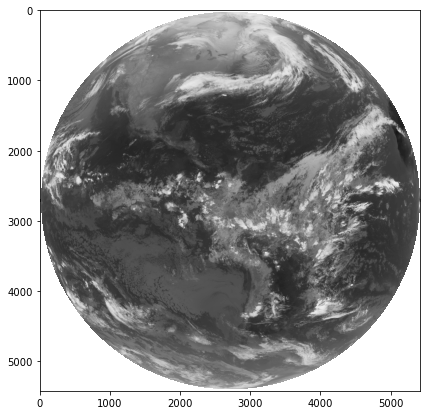

In [9]:
# Training: Python and GOES-R Imagery: Script 1 - Basic Plot / Extracting Pixel Values
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset      # Read / Write NetCDF4 files
import matplotlib.pyplot as plt  # Plotting library
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image 
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("D:/dados_goes_16/OR_ABI-L2-CMIPF-M6C13_G16_s20210611200178_e20210611209497_c20210611209577.nc")
 
# Get the pixel values
data = file.variables['CMI'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Plot the image
plt.imshow(data, vmin=193, vmax=313, cmap='Greys')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Image_01.png')

# Show the image
plt.show()

### Script 02

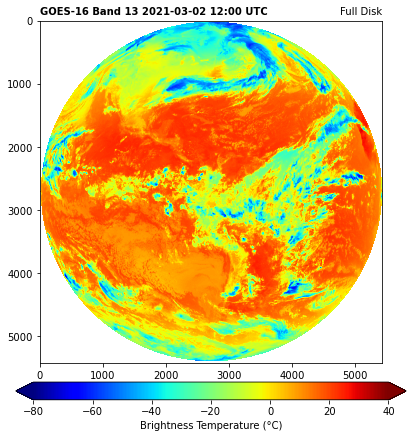

In [10]:
# Training: Python and GOES-R Imagery: Script 2 - Basic Operation / Colorbar / Title / Date
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset      # Read / Write NetCDF4 files
import matplotlib.pyplot as plt  # Plotting library
from datetime import datetime    # Basic Dates and time types
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("D:/dados_goes_16/OR_ABI-L2-CMIPF-M6C13_G16_s20210611200178_e20210611209497_c20210611209577.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Plot the image
plt.imshow(data, vmin=-80, vmax=40, cmap='jet')
 
# Add a colorbar
plt.colorbar(label='Brightness Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract the date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Image_02.png')
 
# Show the image
plt.show()

### Script 3

C:\Users\jales\anaconda3\envs\GOES-16\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\jales\anaconda3\envs\GOES-16\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


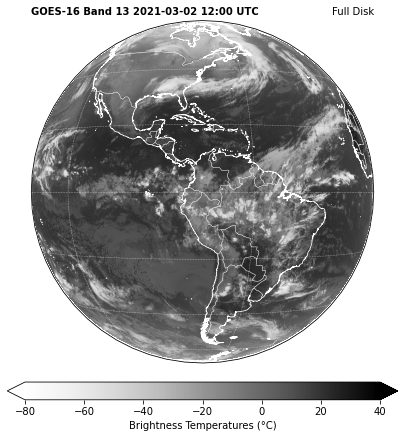

In [11]:
# Training: Python and GOES-R Imagery: Script 3 - Adding a Map with Cartopy 
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("D:/dados_goes_16/OR_ABI-L2-CMIPF-M6C13_G16_s20210611200178_e20210611209497_c20210611209577.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
#----------------------------------------------------------------------------------------------------------- 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
 
# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
 
# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract the date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Image_03.png')
 
# Show the image
plt.show()


### Script 04

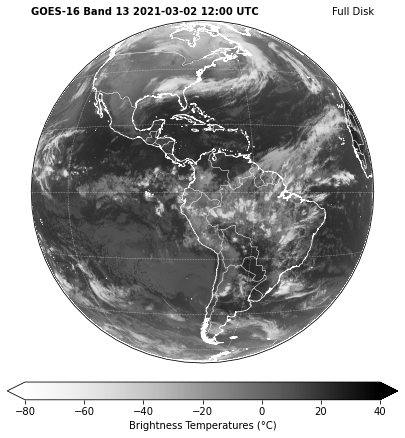

In [12]:
# Training: Python and GOES-R Imagery: Script 4 - Adding a Map with Cartopy (Reading parameters from header)
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("D:/dados_goes_16/OR_ABI-L2-CMIPF-M6C13_G16_s20210611200178_e20210611209497_c20210611209577.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
#----------------------------------------------------------------------------------------------------------- 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))

# Use the Geostationary projection in cartopy
longitude_of_projection_origin = file.variables['goes_imager_projection'].longitude_of_projection_origin
perspective_point_height = file.variables['goes_imager_projection'].perspective_point_height
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude_of_projection_origin, satellite_height=perspective_point_height))

# Extent of data in decimais (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min()*perspective_point_height
xmax = file.variables['x'][:].max()*perspective_point_height
ymin = file.variables['y'][:].min()*perspective_point_height
ymax = file.variables['y'][:].max()*perspective_point_height
img_extent = (xmin, xmax, ymin, ymax)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
 
# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract the date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Image_04.png')
 
# Show the image
plt.show()

### Script 05

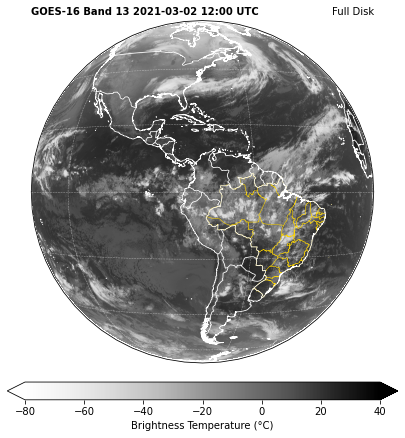

In [15]:
# Training: Python and GOES-R Imagery: Script 5 - Reading a Shapefile
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset                # Read / Write NetCDF4 files
import matplotlib.pyplot as plt            # Plotting library
from datetime import datetime              # Basic Dates and time types
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset('D:/dados_goes_16/OR_ABI-L2-CMIPF-M6C13_G16_s20210611200178_e20210611209497_c20210611209577.nc')
 
# Get the pixel values, and convert to Celsius
data = file.variables['CMI'][:] - 273.15
#----------------------------------------------------------------------------------------------------------- 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
 
# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('D:/dados_goes_16/UFs/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gold',facecolor='none', linewidth=0.3)
 
# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.8)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
 
# Add a colorbar
plt.colorbar(img, label='Brightness Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract the date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Image_05.png')
 
# Show the image
plt.show()